# 範例

透過 SIFT 特徵實作 Brute-Force Matching

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 以灰階方式讀入圖片
img_query = cv2.imread('data/box.png', 0)
img_train = cv2.imread('data/box_in_scene.png', 0)

# 建立 SIFT 物件
sift = cv2.SIFT_create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

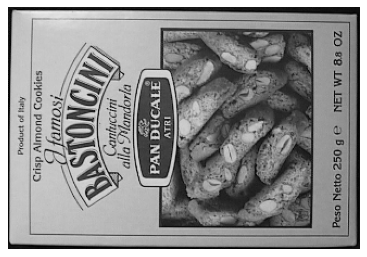

In [29]:
plt.figure(dpi=80)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_query, cv2.COLOR_BGR2RGB))

從下圖中尋找與上圖有關的特徵點

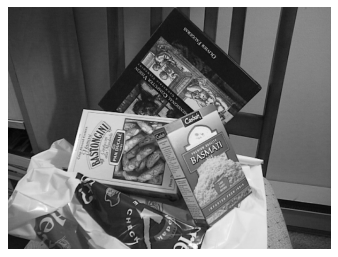

In [30]:
plt.figure(dpi=80)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_train, cv2.COLOR_BGR2RGB))

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

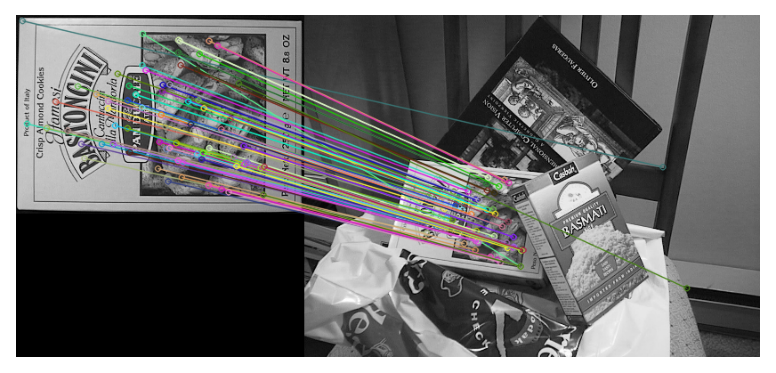

In [27]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

plt.figure(dpi=160)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

官方文件說明一般是建議使用 L2，但 L1 的結果如何呢？看起來有比較多的離群點

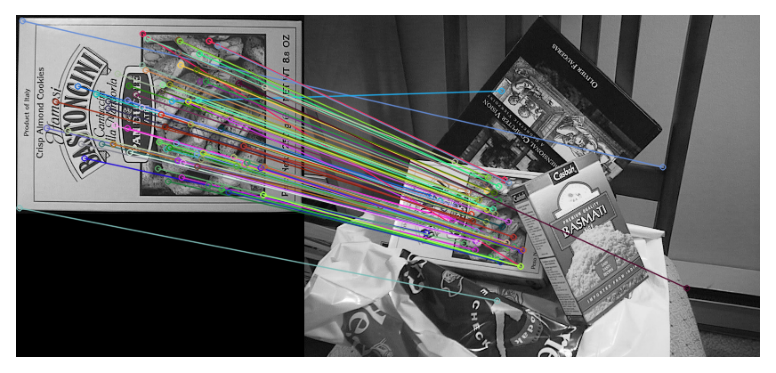

In [31]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L1)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

plt.figure(dpi=160)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

# 思考題

思考 Brute-Force Matching 在應用上是否有甚麼限制？

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works more faster than BFMatcher for large datasets.

Ref: https://github.com/yan-roo/1st-DL-CVMarathon/blob/master/Day010_SIFT%20Application/Day010_Sample.ipynb

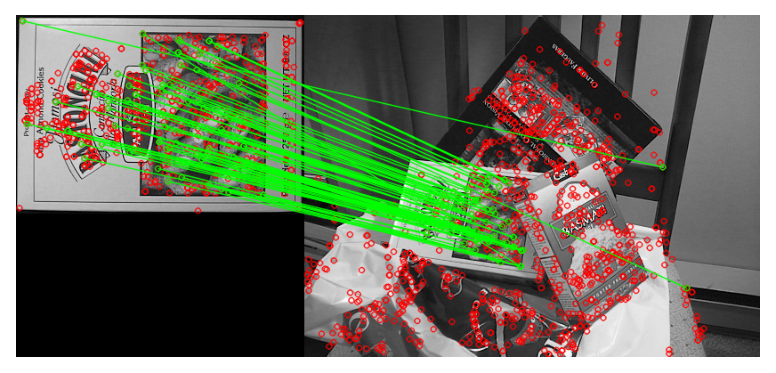

In [18]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des_query,des_train,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img_query,kp_query,img_train,kp_train,matches,None,**draw_params)

plt.figure(dpi=160)
plt.axis('off')
plt.imshow(img3)